In [ ]:
!pip install pandas
!pip install seaborn
%matplotlib inline
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [1055]:
train=pd.read_csv('/Users/jrx/Desktop/Python/DA/train.csv')
store=pd.read_csv('/Users/jrx/Desktop/Python/DA/store.csv')
train.head()

/var/folders/p1/pzrjg_ps1qz4qvhp7xz5wbwm0000gn/T/ipykernel_1297/1902359603.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('/Users/jrx/Desktop/Python/DA/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [1056]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [1057]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [1058]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [1059]:
store=store.drop(columns=['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,1,c,a,1270.0,9.0,2008.0
1,2,a,a,570.0,11.0,2007.0
2,3,a,a,14130.0,12.0,2006.0
3,4,c,c,620.0,9.0,2009.0
4,5,a,a,29910.0,4.0,2015.0


In [1060]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])
print(sum(store['CompetitionDistance'].isna()))
print(sum(store['CompetitionOpenSinceMonth'].isna()))
print(sum(store['CompetitionOpenSinceYear'].isna()))

0
0
0


In [1061]:
salessum=train.groupby('Store')['Sales','Customers','Open','Promo'].agg([np.sum])
salessum.columns=['Tsales','Tcustomers','Topen','Tpromo']
salessum.head()

/var/folders/p1/pzrjg_ps1qz4qvhp7xz5wbwm0000gn/T/ipykernel_1297/184817805.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salessum=train.groupby('Store')['Sales','Customers','Open','Promo'].agg([np.sum])


,Tsales,Tcustomers,Topen,Tpromo
Store,,,,
1,3716854,440523,781,360
2,3883858,457855,784,360
3,5408261,584310,779,360
4,7556507,1036254,784,360
5,3642818,418588,779,360


In [1062]:
store=store.merge(salessum,on='Store',how='left')

In [1063]:
store['Cmonth']=store.apply(lambda x:(2016-x['CompetitionOpenSinceYear'])*12-x['CompetitionOpenSinceMonth']-4,axis=1)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Tsales,Tcustomers,Topen,Tpromo,Cmonth
0,1,c,a,1270.0,9.0,2008.0,3716854,440523,781,360,83.0
1,2,a,a,570.0,11.0,2007.0,3883858,457855,784,360,93.0
2,3,a,a,14130.0,12.0,2006.0,5408261,584310,779,360,104.0
3,4,c,c,620.0,9.0,2009.0,7556507,1036254,784,360,71.0
4,5,a,a,29910.0,4.0,2015.0,3642818,418588,779,360,4.0


In [1064]:
train=train.merge(store[['Store','StoreType','Assortment','CompetitionDistance','Cmonth']],on='Store',how='left')
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Cmonth
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,83.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,93.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,104.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,71.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0


In [1065]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1066]:
train['DayOfWeek'].unique()
train['Open'].unique()
train['Promo'].unique()
train['StateHoliday'].unique()
train['SchoolHoliday'].unique()
store['StoreType'].unique()
store['Assortment'].unique()

array([5, 4, 3, 2, 1, 7, 6])

array([1, 0])

array([1, 0])

array(['0', 'a', 'b', 'c', 0], dtype=object)

array([1, 0])

array(['c', 'a', 'd', 'b'], dtype=object)

array(['a', 'c', 'b'], dtype=object)

In [1067]:
train['StateHoliday']=train['StateHoliday'].map({'0':'n',0:'n','a':'a','b':'b','c':'c'})
train['StateHoliday'].unique()

array(['n', 'a', 'b', 'c'], dtype=object)

Text(0.5, 1.0, 'scatter of store - 1')

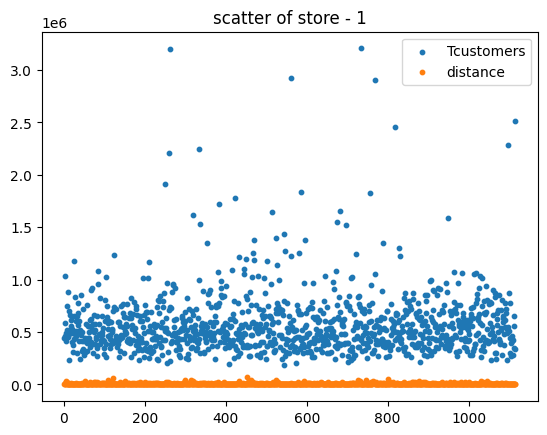

In [1068]:
plt.title('scatter of store - 1')
plt.scatter(store['Store'],store['Tcustomers'],label='Tcustomers',s=10)
plt.scatter(store['Store'],store['CompetitionDistance'],label='distance',s=10)
plt.legend()
plt.show()

Text(0.5, 1.0, 'scatter of store - 2')

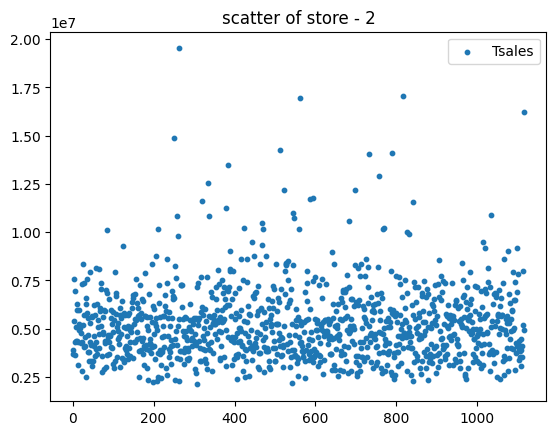

In [1069]:
plt.title('scatter of store - 2')
plt.scatter(store['Store'],store['Tsales'],label='Tsales',s=10)
plt.legend()
plt.show()

Text(0.5, 1.0, 'scatter of train')

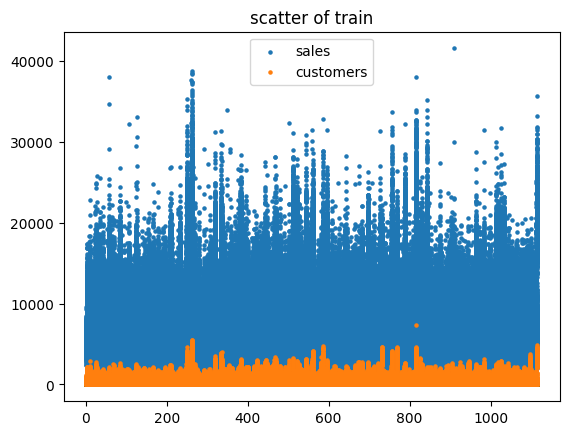

In [1070]:
plt.title('scatter of train')
plt.scatter(train['Store'],train['Sales'],label='sales',s=5)
plt.scatter(train['Store'],train['Customers'],label='customers',s=5)
plt.legend()
plt.show()

In [1071]:
train.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Cmonth               1017209 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 108.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64

In [1072]:
store[store['Store']==5].head()
store=store.drop(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])
store.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Tsales,Tcustomers,Topen,Tpromo,Cmonth
4,5,a,a,29910.0,4.0,2015.0,3642818,418588,779,360,4.0


,Store,CompetitionDistance,Tsales,Tcustomers,Topen,Tpromo,Cmonth
count,1115.00000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,5.267427e+06,5.776159e+05,757.302242,348.053812,59.684305
std,322.01708,7652.849306,1.951304e+06,3.046545e+05,63.861126,27.239162,66.242407
min,1.00000,20.000000,2.114322e+06,1.875830e+05,592.000000,286.000000,0.000000
25%,279.50000,720.000000,3.949377e+06,4.053910e+05,776.000000,360.000000,23.000000
50%,558.00000,2330.000000,4.990259e+06,5.092330e+05,779.000000,360.000000,33.000000
75%,836.50000,6875.000000,6.084148e+06,6.715440e+05,782.000000,360.000000,89.000000
max,1115.00000,75860.000000,1.951684e+07,3.206058e+06,942.000000,360.000000,1387.000000


In [1073]:
store['StoreType'].value_counts()
store['Assortment'].value_counts()
store[['StoreType','Assortment']].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

a    593
c    513
b      9
Name: Assortment, dtype: int64

StoreType  Assortment
a          a             381
           c             221
d          c             220
           a             128
c          a              77
           c              71
b          b               9
           a               7
           c               1
dtype: int64

Text(0.5, 1.0, 'distribution of storetype')

([<matplotlib.patches.Wedge at 0x6e7ced240>,
 [Text(-0.15006444137023842, 1.1905799693578918, 'a'),
  Text(-0.3663352862540762, -1.0372070468547465, 'd'),
  Text(0.9585126606875257, -0.5396790521242422, 'c'),
  Text(1.0987383854704569, -0.052668399384963635, 'b')],
 [Text(-0.08753759079930575, 0.6945049821254368, '54.0%'),
  Text(-0.19981924704767792, -0.5657492982844071, '31.2%'),
  Text(0.5228250876477413, -0.2943703920677684, '13.3%'),
  Text(0.5993118466202491, -0.028728217846343794, '1.5%')])

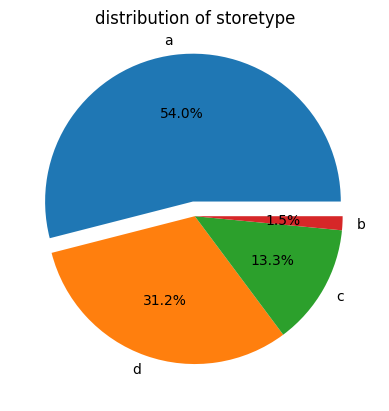

In [1074]:
plt.title('distribution of storetype')
counts=[602,348,148,17]
labels=['a','d','c','b']
plt.pie(counts,labels=labels,explode=(0.1,0,0,0),autopct='%1.1f%%')

Text(0.5, 1.0, 'distribution of assortment')

([<matplotlib.patches.Wedge at 0x6e7d787f0>,
 [Text(-0.11982841173932403, 1.1940021573431228, 'a'),
  Text(-1.0721738960252785, -0.24585185922009062, 'b'),
  Text(0.13755885412150268, -1.0913649992796999, 'c')],
 [Text(-0.06989990684793901, 0.6965012584501549, '53.2%'),
  Text(-0.5848221251046973, -0.1341010141200494, '0.8%'),
  Text(0.07503210224809237, -0.5952899996071089, '46.0%')])

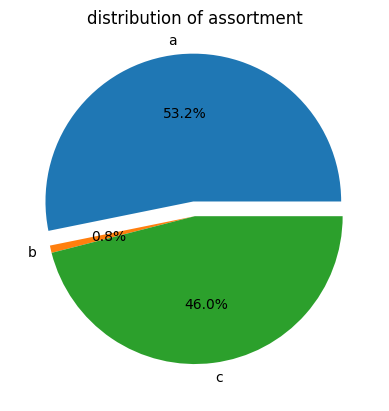

In [1075]:
plt.title('distribution of assortment')
counts=[593,9,513]
labels=['a','b','c']
plt.pie(counts,labels=labels,explode=(0.1,0,0,),autopct='%1.1f%%')

<Figure size 500x600 with 0 Axes>

Text(0.5, 1.0, 'distribution of storegroup')

([<matplotlib.patches.Wedge at 0x71413eb60>,
 [Text(0.5724666856401572, 1.0546477581790867, 'aa'),
  Text(-1.0247946721526926, 0.39974476848040874, 'ac'),
  Text(-0.708779602641006, -0.8412083421365112, 'dc'),
  Text(0.3043595356689879, -1.0570550000105756, 'da'),
  Text(0.8321542975641882, -0.7193880907031007, 'ca'),
  Text(1.052211734839021, -0.32070307929151187, 'cc'),
  Text(1.2967762357555594, -0.09149532435945688, 'bb'),
  Text(1.3995499006791037, -0.03549754229677632, 'ba'),
  Text(1.499994046146974, -0.004226289581864901, 'bc')],
 [Text(0.33393889995675835, 0.615211192271134, '34.2%'),
  Text(-0.5589789120832868, 0.21804260098931383, '19.8%'),
  Text(-0.38660705598600326, -0.4588409138926424, '19.7%'),
  Text(0.16601429218308428, -0.576575454551223, '11.5%'),
  Text(0.4539023441259208, -0.39239350401987305, '6.9%'),
  Text(0.5739336735485568, -0.17492895234082464, '6.4%'),
  Text(0.7980161450803441, -0.056304814990435006, '0.8%'),
  Text(0.8997106504365665, -0.02281984861935620

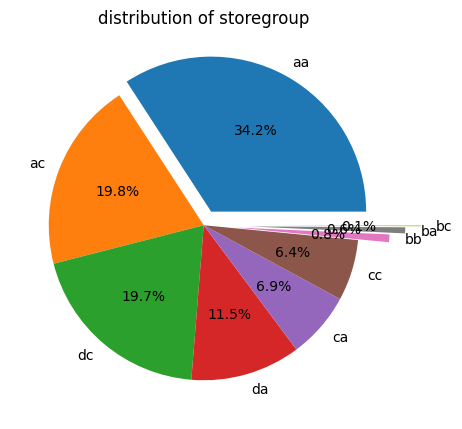

In [1076]:
plt.figure(figsize=(5,6))
plt.title('distribution of storegroup')
counts=[381,221,220,128,77,71,9,7,1]
labels=['aa','ac','dc','da','ca','cc','bb','ba','bc']
plt.pie(counts,labels=labels,explode=(0.1,0,0,0,0,0,0.2,0.3,0.4),autopct='%1.1f%%')

(<Figure size 700x700 with 1 Axes>, <AxesSubplot: >)

/var/folders/p1/pzrjg_ps1qz4qvhp7xz5wbwm0000gn/T/ipykernel_1297/3141614151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(store.corr(),annot=True,square=True,vmax=1,cmap='PuBu',fmt='.2g')


<AxesSubplot: >

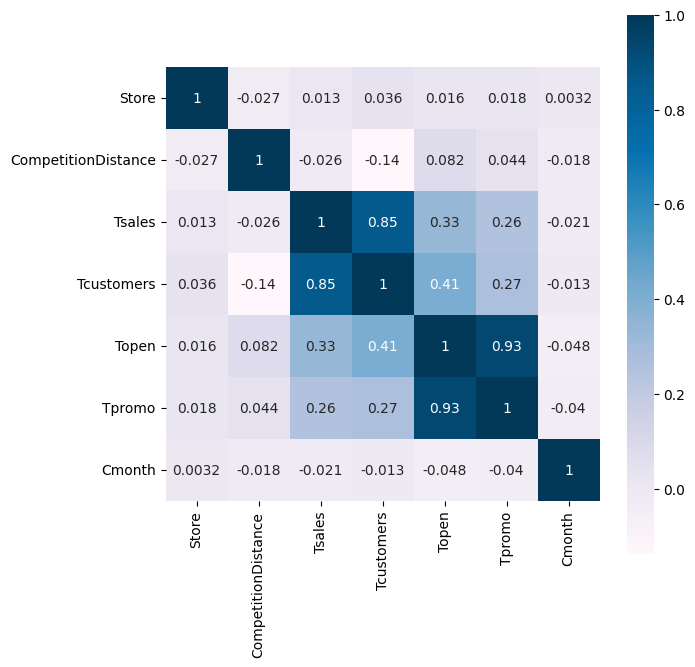

In [1077]:
plt.subplots(figsize=(7,7))
sns.heatmap(store.corr(),annot=True,square=True,vmax=1,cmap='PuBu',fmt='.2g')

<AxesSubplot: xlabel='StoreType,Assortment'>

<AxesSubplot: xlabel='StoreType,Assortment'>

Text(0.5, 1.0, 'average sales and customers of store type')

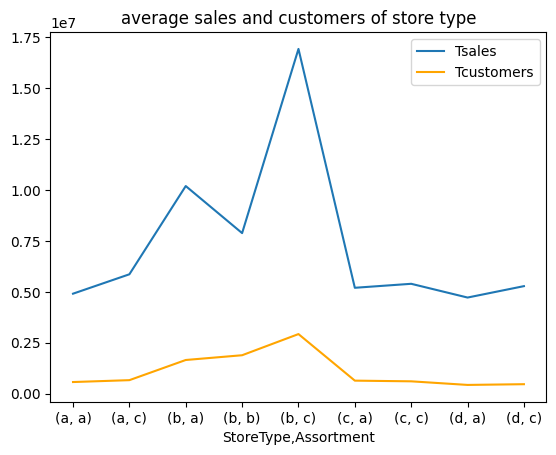

In [1078]:
store.groupby(['StoreType', 'Assortment']).Tsales.mean().plot()
store.groupby(['StoreType', 'Assortment']).Tcustomers.mean().plot(color='orange')
plt.title('average sales and customers of store type')
plt.legend()

<AxesSubplot: xlabel='StoreType,Assortment'>

Text(0.5, 1.0, 'average distance of store type')

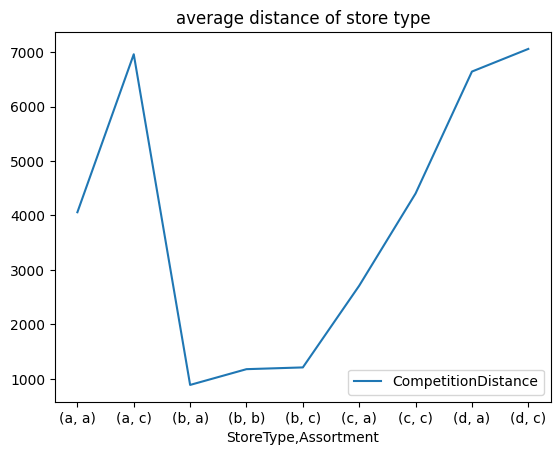

In [1079]:
store.groupby(['StoreType', 'Assortment']).CompetitionDistance.mean().plot()
plt.title('average distance of store type')
plt.legend()

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='Date'>

<AxesSubplot: xlabel='Date'>

<AxesSubplot: xlabel='Date'>

<AxesSubplot: xlabel='Date'>

Text(0.5, 1.0, 'average sales per day')

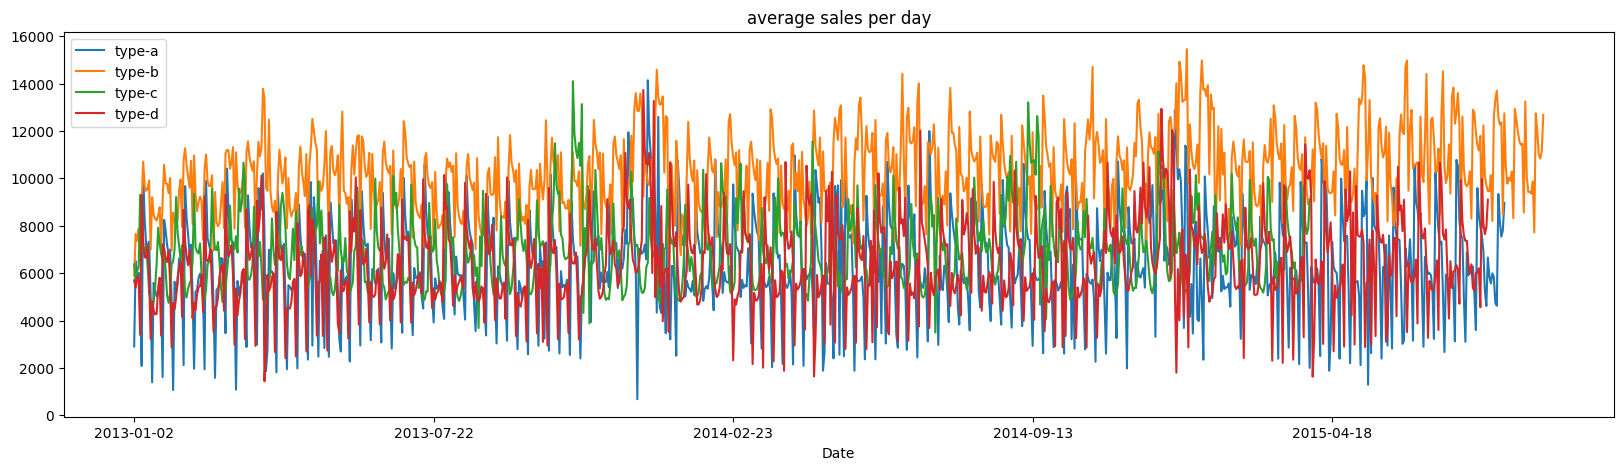

In [1080]:
plt.figure(figsize=(20,5))
train[(train['Open']!=0) & (train['StoreType']=='a')].groupby('Date').Sales.mean().plot(label='type-a')
train[(train['Open']!=0) & (train['StoreType']=='b')].groupby('Date').Sales.mean().plot(label='type-b')
train[(train['Open']!=0) & (train['StoreType']=='c')].groupby('Date').Sales.mean().plot(label='type-c')
train[(train['Open']!=0) & (train['StoreType']=='d')].groupby('Date').Sales.mean().plot(label='type-d')
plt.title('average sales per day')
plt.legend()

<AxesSubplot: xlabel='DayOfWeek'>

<AxesSubplot: xlabel='DayOfWeek'>

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'average sales per day of week')

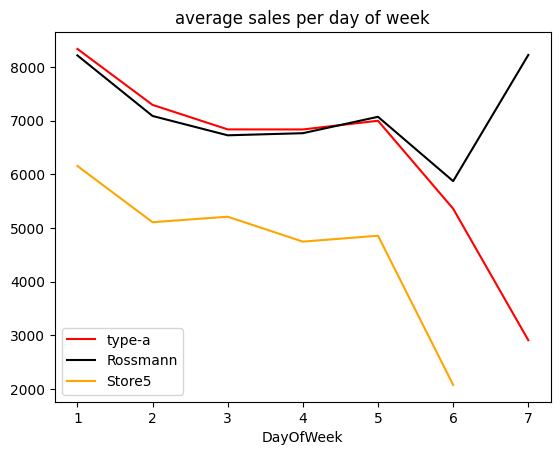

In [1081]:
train[(train['Open']!=0) & (train['StoreType']=='a')].groupby('DayOfWeek').Sales.mean().plot(color='red',label='type-a')
train[train['Open']!=0].groupby('DayOfWeek').Sales.mean().plot(label='Rossmann',color='black')
train[(train['Store']==5) & (train['Open']!=0)].groupby('DayOfWeek').Sales.mean().plot(label='Store5',color='orange')
plt.title('average sales per day of week')
plt.legend()

<AxesSubplot: xlabel='DayOfWeek'>

<AxesSubplot: xlabel='DayOfWeek'>

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'average customers per day of week')

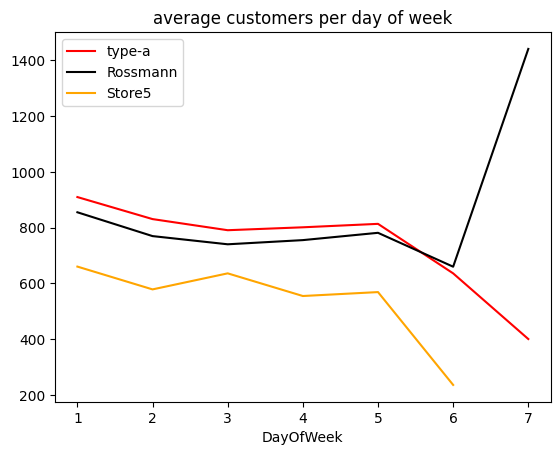

In [1082]:
train[(train['Open']!=0) & (train['StoreType']=='a')].groupby('DayOfWeek').Customers.mean().plot(color='red',label='type-a')
train[train['Open']!=0].groupby('DayOfWeek').Customers.mean().plot(label='Rossmann',color='black')
train[(train['Store']==5) & (train['Open']!=0)].groupby('DayOfWeek').Customers.mean().plot(label='Store5',color='orange')
plt.title('average customers per day of week')
plt.legend()

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'opening days of Rossmann')

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'opening days of Store5')

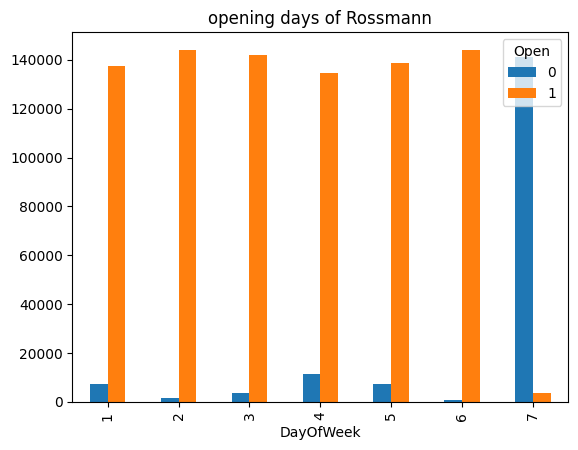

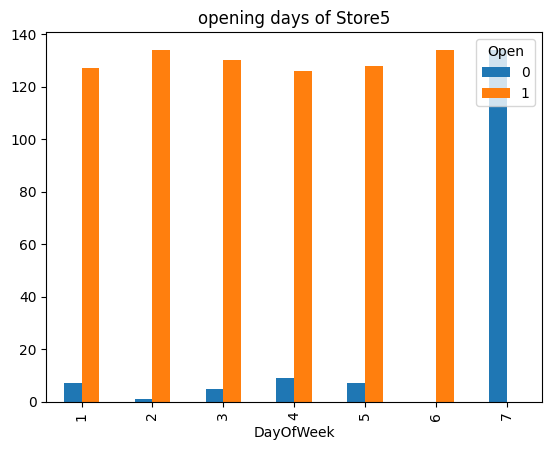

In [1083]:
train.groupby(['DayOfWeek','Open']).Open.count().unstack().plot(kind='bar')
plt.title('opening days of Rossmann')
train[train['Store']==5].groupby(['DayOfWeek','Open']).Open.count().unstack().plot(kind='bar')
plt.title('opening days of Store5')

<AxesSubplot: xlabel='month'>

<AxesSubplot: xlabel='month'>

<AxesSubplot: xlabel='month'>

Text(0.5, 1.0, 'average sales per month')

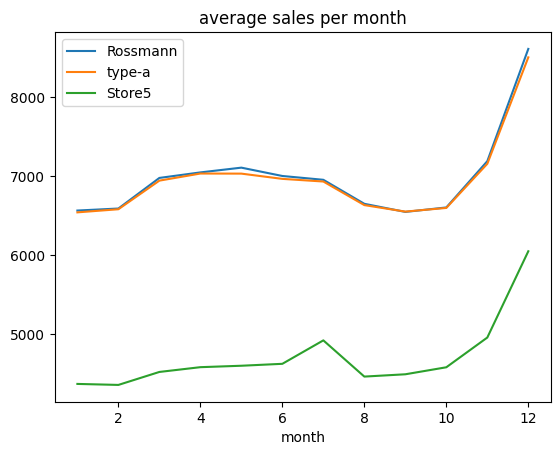

In [1084]:
train['month']=pd.DatetimeIndex(train['Date']).month
train[train['Open']!=0].groupby('month').Sales.mean().plot(label='Rossmann')
train[(train['Open']!=0) & (train['StoreType']=='a')].groupby('month').Sales.mean().plot(label='type-a')
train[(train['Store']==5) & (train['Open']!=0)].groupby('month').Sales.mean().plot(label='Store5')
plt.title('average sales per month')
plt.legend()

<AxesSubplot: xlabel='month'>

<AxesSubplot: xlabel='month'>

<AxesSubplot: xlabel='month'>

Text(0.5, 1.0, 'average customers per month')

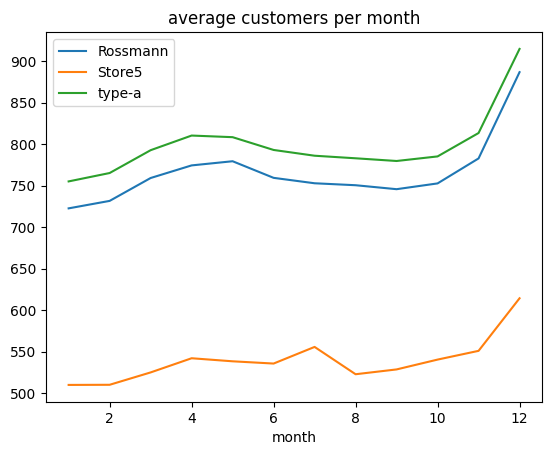

In [1085]:
train[train['Open']!=0].groupby('month').Customers.mean().plot(label='Rossmann')
train[(train['Store']==5) & (train['Open']!=0)].groupby('month').Customers.mean().plot(label='Store5')
train[(train['Open']!=0) & (train['StoreType']=='a')].groupby('month').Customers.mean().plot(label='type-a')
plt.title('average customers per month')
plt.legend()

<AxesSubplot: xlabel='month'>

Text(0.5, 1.0, 'opening days of Rossmann per month')

<AxesSubplot: xlabel='month'>

Text(0.5, 1.0, 'opening days of Store5 per month')

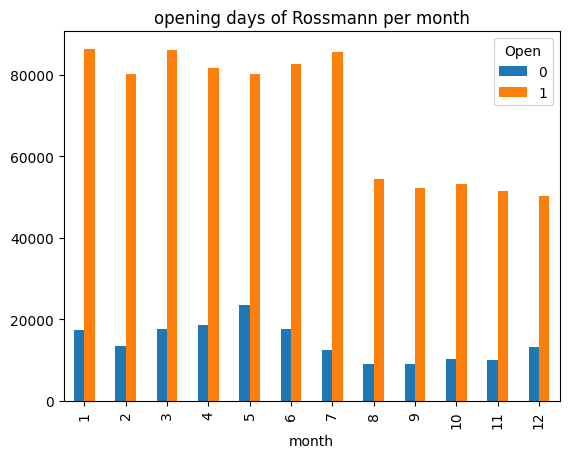

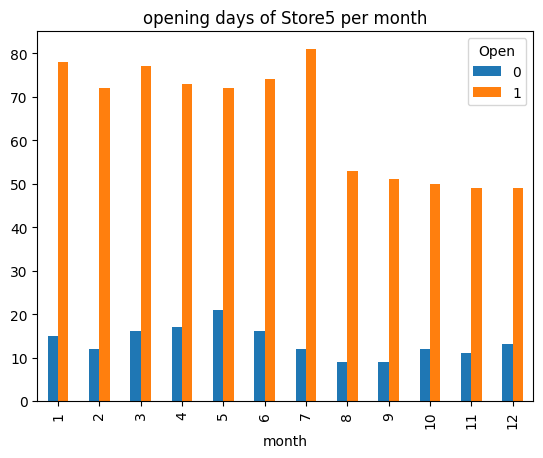

In [1086]:
train.groupby(['month','Open']).Open.count().unstack().plot(kind='bar')
plt.title('opening days of Rossmann per month')
train[train['Store']==5].groupby(['month','Open']).Open.count().unstack().plot(kind='bar')
plt.title('opening days of Store5 per month')

<AxesSubplot: xlabel='month'>

Text(0.5, 1.0, 'stateholidays per month')

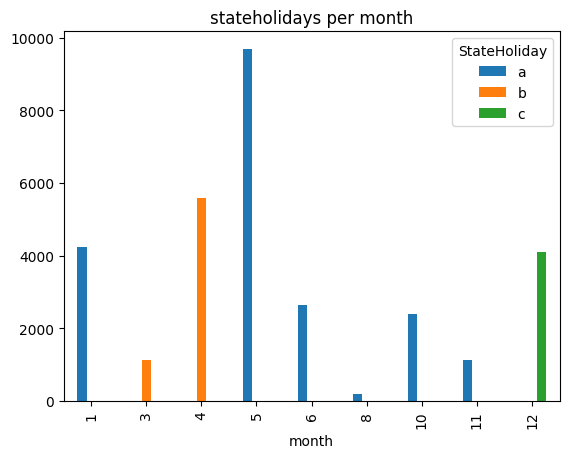

In [1087]:
train[train['StateHoliday']!='n'].groupby(['month','StateHoliday']).StateHoliday.count().unstack().plot(kind='bar')
plt.title('stateholidays per month')

<AxesSubplot: xlabel='month'>

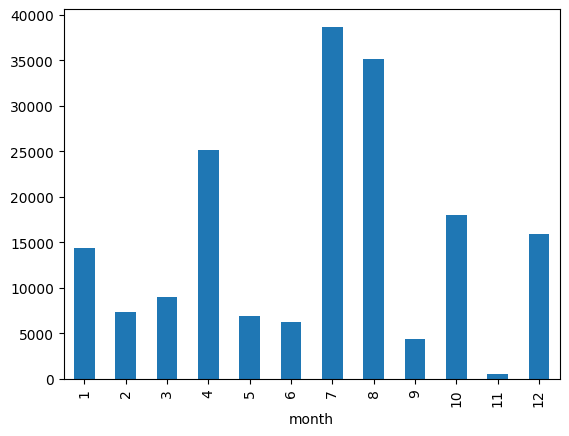

In [1088]:
train.groupby('month').SchoolHoliday.sum().plot(kind='bar')

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'sales based on promotion - Rossmann')

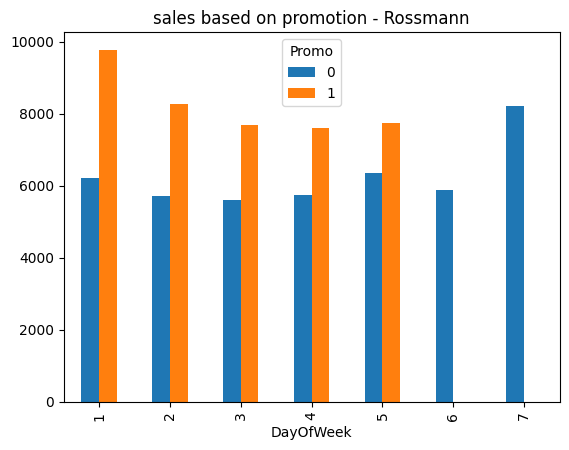

In [1089]:
train[train['Open']!=0].groupby(['DayOfWeek','Promo']).Sales.mean().unstack().plot(kind='bar')
plt.title('sales based on promotion - Rossmann')

<AxesSubplot: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'sales based on promotion - Store5')

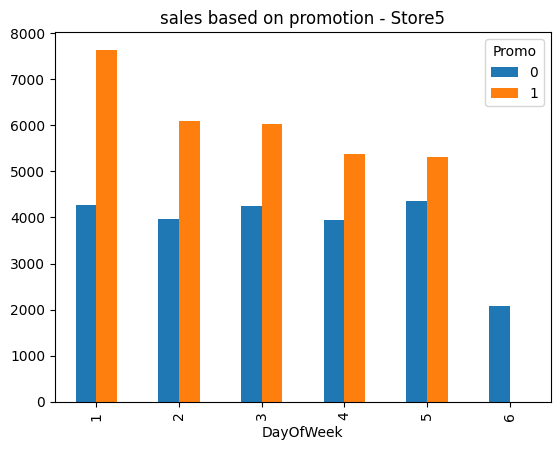

In [1090]:
train[(train['Open']!=0) & (train['Store']==5)].groupby(['DayOfWeek','Promo']).Sales.mean().unstack().plot(kind='bar')
plt.title('sales based on promotion - Store5')

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

/var/folders/p1/pzrjg_ps1qz4qvhp7xz5wbwm0000gn/T/ipykernel_1297/2629411769.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,square=True,vmax=1,cmap='PuBu',fmt='.2g')


<AxesSubplot: >

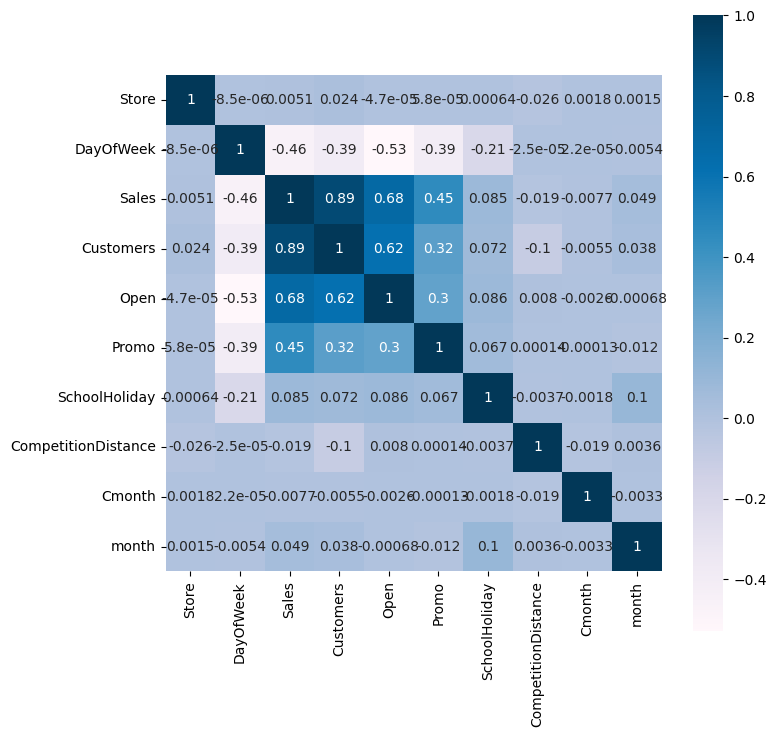

In [1091]:
plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,square=True,vmax=1,cmap='PuBu',fmt='.2g')

Text(0.5, 1.0, 'distsnce-sales scatter plot')

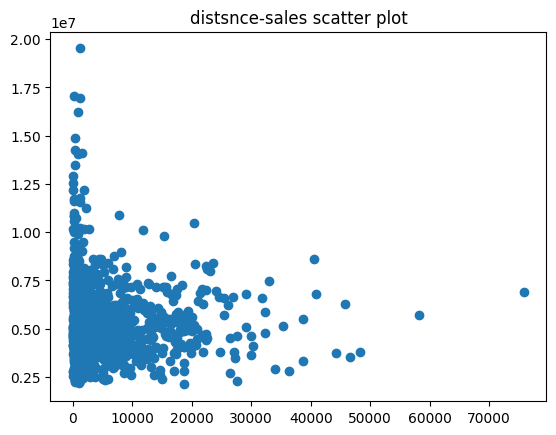

In [1092]:
x=store['CompetitionDistance']
y=store['Tsales']
plt.scatter(x,y)
plt.title('distsnce-sales scatter plot')

In [1093]:
trainre=train[train['Open']==1]
model = smf.ols(formula='Sales~Customers+Promo+CompetitionDistance+Cmonth',data=trainre)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 5.821e+05
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:51:21   Log-Likelihood:            -7.4286e+06
No. Observations:              844392   AIC:                         1.486e+07
Df Residuals:                  844387   BIC:                         1.486e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1473.1237    

In [1094]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=trainre[['Customers','Promo','CompetitionDistance','Cmonth']]
x[5]=1
print(x)
variance_inflation_factor(x[['Customers','Promo','CompetitionDistance','Cmonth',5]].values, 1)

         Customers  Promo  CompetitionDistance  Cmonth  5
0              555      1               1270.0    83.0  1
1              625      1                570.0    93.0  1
2              821      1              14130.0   104.0  1
3             1498      1                620.0    71.0  1
4              559      1              29910.0     4.0  1
...            ...    ...                  ...     ... ..
1016776        566      0                150.0   107.0  1
1016827       2377      0                860.0   190.0  1
1016863       1248      0                840.0    23.0  1
1017042       1039      0               1430.0    23.0  1
1017190       1405      0                720.0   161.0  1

[844392 rows x 5 columns]


/var/folders/p1/pzrjg_ps1qz4qvhp7xz5wbwm0000gn/T/ipykernel_1297/1647932863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[5]=1


1.0352637127853137